Make sure you write dimesnions using writeDimensions(nx, ny)
2 0.1 40 4


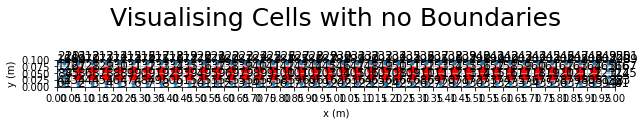

/home/scottlevie/newPythonSolver/python_fv_csm/seperate_notebooks/Background_Functions.ipynb:350: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  "        \n",


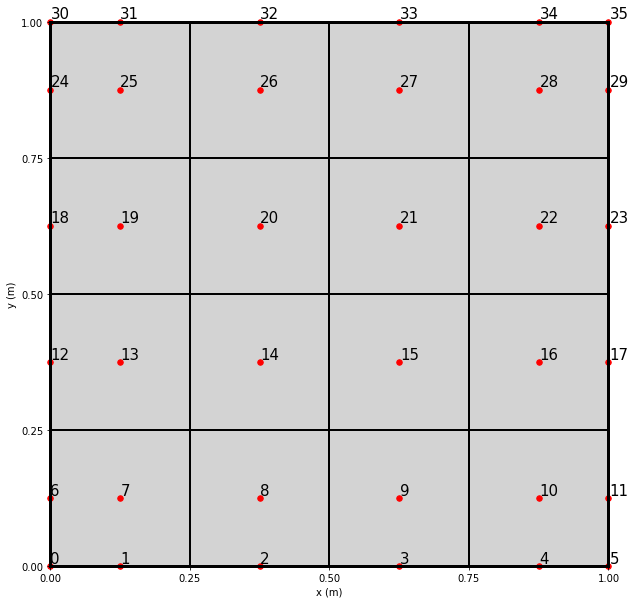

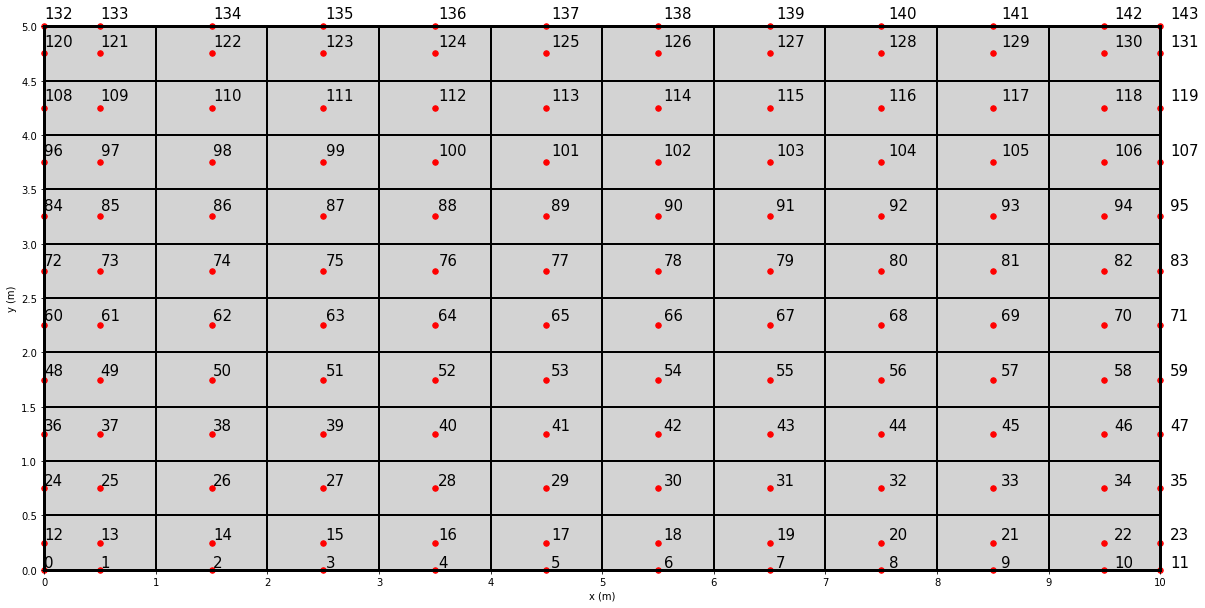

(144, 2)
Number of nodes in Mesh: 144
Number of dimensions: 2
Shear Modulus (mu): 76923076923.07692
Lame Modulus (_lambda): 115384615384.61539
Printing example a-term values for fixed displacement cell on the top boundary:

a_N should be twice the size of a_S
a_E and a_W should be identical

Value for a_N:  307692307692.3077
Value for a_S:  153846153846.15384
Value for a_E:  134615384615.38461
Value for a_W:  134615384615.38461
Value for a_P:  730769230769.2308


In [1]:
from ipynb.fs.full.Background_Functions import * 
from ipynb.fs.full._04_Fixed_Displacement_BCs import * 

# Ignore outputs from this cell

# Fixed Traction Boundary Conditions
***

A fixed traction boundary condition is where the traction on the boundary is fixed, i.e. there is a constant force acting on the boundary face.

Traction is described as: 

$$ force = |traction| |Area|$$

*Can you think of any real world examples?*

Here's one: 

- Uniformly distributed load across a beam:

<img src="./Paper_Images/uniform_load.png" alt="Drawing" style="width: 400px;"/> 

This means that a load (force) is evenly distributed per unit area. 

<img src="./Paper_Images/uniform_load_zoomed_in.png" alt="Drawing" style="width: 500px;"/> 

The goal of our solver is to produce $\boldsymbol{u}$ field that continuously satisfies this constant traction condition. 



## Cell Boundaries

For cells which share a face with the boundary, we need to set the *force term* for the face on the boundary equal to the force produced by the fixed traction boundary condition.

Starting from the momentum equation:

$$ \underbrace{  \rho \int_V \frac{\partial^2 (\boldsymbol{u})}{\partial t^2} \, dV }_{Temporal\space term} -\underbrace{ \oint_S n \cdot \boldsymbol{\sigma} \, dS }_{Force\space term} = 0$$


Splitting the force term into separate force terms for each face, we can see that they take the following form:

$$ force = |traction| |Area|$$

### x-equation:

$$
\frac{\rho}{\Delta t^2} \left(   u_p^n V^n -2  u_p^o V^o + u_p^{oo} V^{oo} \right)
-
\underbrace{
\left[
\mu \left( \dfrac{\delta v}{\delta x} + \dfrac{\delta u}{\delta y} \right)
\right] _N 
}_{{tr_x}_N }
|S_N|
+
\underbrace{
\left[
\mu \left( \dfrac{\delta v}{\delta x} + \dfrac{\delta u}{\delta y} \right)
\right] _S 
}_{{tr_x}_S }
|S_S|
- 
\underbrace{
\left[
(2\mu + \lambda)\dfrac{\delta u}{\delta x} + \lambda\dfrac{\delta v}{\delta y}
\right] _E 
}_{{tr_x}_E }
|S_E|
+ 
\underbrace{
\left[
(2\mu + \lambda)\dfrac{\delta u}{\delta x} + \lambda\dfrac{\delta v}{\delta y}
\right] _W
}_{{tr_x}_W }
|S_W|
= 0
$$

### y-equation:

$$
\frac{\rho}{\Delta t^2} \left(   v_p^n V^n -2  v_p^o V^o + v_p^{oo} V^{oo} \right)
-
\underbrace{
\left[
(2\mu + \lambda)\dfrac{\delta v}{\delta y} + \lambda\dfrac{\delta u}{\delta x}
\right] _N 
}_{{tr_y}_N}
|S_N|
+
\underbrace{
\left[
(2\mu + \lambda)\dfrac{\delta v}{\delta y} + \lambda\dfrac{\delta u}{\delta x}
\right] _S 
}_{{tr_y}_S}
|S_S|
- 
\underbrace{
\left[
\mu \left( \dfrac{\delta v}{\delta x} + \dfrac{\delta u}{\delta y} \right)
\right] _E 
}_{{tr_y}_E}
|S_E|
+ 
\underbrace{
\left[
\mu \left( \dfrac{\delta v}{\delta x} + \dfrac{\delta u}{\delta y} \right)
\right] _W 
}_{{tr_y}_W}
|S_W|
= 0
$$

With a fixed boundary condition the traction in the x and y direction on the the boundary is set at a fixed value. 

Taking an example of the top boundary having a fixed traction BC:

### x-equation:

<!-- The red parts change depending on markdown type -->

$$
\frac{\rho}{\Delta t^2} \left(   u_p^n V^n -2  u_p^o V^o + u_p^{oo} V^{oo} \right)
-
\underbrace{
\left[
\mu \left( \dfrac{\delta v}{\delta x} + \dfrac{\delta u}{\delta y} \right)
\right] _N 
}_{ \color{red}{{tr_x}_N} }
|S_N|
+
\left[
\mu \left( \dfrac{\delta v}{\delta x} + \dfrac{\delta u}{\delta y} \right)
\right] _S |S_S|
- 
\left[
(2\mu + \lambda)\dfrac{\delta u}{\delta x} + \lambda\dfrac{\delta v}{\delta y}
\right] _E |S_E|
+ 
\left[
(2\mu + \lambda)\dfrac{\delta u}{\delta x} + \lambda\dfrac{\delta v}{\delta y}
\right] _W |S_W|
= 0
$$

As we know the fixed traction value, the term containing this is known. Putting the unknowns on the LHS and the knowns on the RHS:

$$
\frac{\rho}{\Delta t^2} \left( u_p^n V^n \right) 
+
\mu \left( \dfrac{\delta u}{\delta y} \right)
 _S |S_S|
- 
(2\mu + \lambda)
\left(\dfrac{\delta u}{\delta x} \right)
 _E |S_E|
+ 
(2\mu + \lambda)
\left(\dfrac{\delta u}{\delta x}\right) 
 _W |S_W|
= 
\frac{\rho}{\Delta t^2} \left( 2  u_p^o V^o - u_p^{oo} V^{oo} \right)
+
\underbrace{\color{red}{{tr_x}_N} |S_N|}_{Force\space term}  
-
\mu \left( \dfrac{\delta v}{\delta x} \right)
_S |S_S|
+ 
\lambda
\left(\dfrac{\delta v}{\delta y}\right)
_E |S_E|
- 
\lambda
\left(\dfrac{\delta v}{\delta y}\right)
_W |S_W|
$$

### y-equation:

$$
\frac{\rho}{\Delta t^2} \left(   v_p^n V^n -2  v_p^o V^o + v_p^{oo} V^{oo} \right)
-
\underbrace{
\left[
(2\mu + \lambda)\dfrac{\delta v}{\delta y} + \lambda\dfrac{\delta u}{\delta x}
\right] _N 
}_{\color{red}{{tr_y}_N}}
|S_N|
+
\left[
(2\mu + \lambda)\dfrac{\delta v}{\delta y} + \lambda\dfrac{\delta u}{\delta x}
\right] _S |S_S|
- 
\left[
\mu \left( \dfrac{\delta v}{\delta x} + \dfrac{\delta u}{\delta y} \right)
\right] _E |S_E|
+ 
\left[
\mu \left( \dfrac{\delta v}{\delta x} + \dfrac{\delta u}{\delta y} \right)
\right] _W |S_W|
= 0
$$

Putting the unknowns on the LHS and the knowns on the RHS:

$$
\frac{\rho}{\Delta t^2} \left(   v_p^n V^n \right)
-
(2\mu + \lambda)
\left(\dfrac{\delta v}{\delta y} \right)
_S |S_S|
- 
\mu
\left( \dfrac{\delta v}{\delta x}\right)
 _E |S_E|
+ 
\mu
\left( \dfrac{\delta v}{\delta x}\right)
 _W |S_W|
= 
\frac{\rho}{\Delta t^2} \left( 2  v_p^o V^o - v_p^{oo} V^{oo} \right)
+
\underbrace{\color{red}{{tr_y}_N} |S_N|}_{Force\space term}  
-
(2\mu + \lambda)
\left(\lambda\dfrac{\delta u}{\delta x} \right)
_S |S_S|
+ 
\mu
\left( \dfrac{\delta u}{\delta y} \right)
_E |S_E|
- 
\mu 
\left(  \dfrac{\delta u}{\delta y} \right) 
_W |S_W|
$$

So as you can see on the LHS (A-matrix) we lose the term corresponding to the face on the boundary. On the RHS (b-matrix) the usual term as seen for internal cells is replaced by the force term for the face on the boundary. 

## $A$-matrix terms

The term referring to the face on the boundary (N in the case above) becomes zero in the A matrix.

So we need to some code that passes the same internal cell values from class <code>A</code> except for the term on the boundary:

In [17]:
# Example values
xy = "x"
boundaries = ["t"]

# Initialise a terms to the same as internal cell values
a_N = A(xy).a_N
a_S = A(xy).a_S
a_E = A(xy).a_E
a_W = A(xy).a_W

# Zero a terms if on the boundary
for boundary in boundaries:
    if boundary == "b": a_S = 0
    if boundary == "t": a_N = 0
    if boundary == "l": a_W = 0
    if boundary == "r": a_E = 0

# Sum the boundary a terms and the temporal a term for a_p
if transient:
    a_P = (rho*dx*dy/(dt**2)) + a_N + a_S + a_E + a_W
else:
    a_P = a_N + a_S + a_E + a_W

print("Printing a-term values for fixed traction cell on the top boundary:\n")
print("a_N should 0")
print("a_E and a_W should be identical\n")

print("Value for a_N: ", a_N)
print("Value for a_S: ", a_S)
print("Value for a_E: ", a_E)
print("Value for a_W: ", a_W)
print("Value for a_P: ", a_P)


Printing a-term values for fixed traction cell on the top boundary:

a_N should 0
a_E and a_W should be identical

Value for a_N:  0
Value for a_S:  153846153846.15384
Value for a_E:  134615384615.38461
Value for a_W:  134615384615.38461
Value for a_P:  423076923076.9231


# $b$-matrix terms

For the b term, of RHS of the momentum equation, the same process for face terms for the internal cells is followed. However the internal cell term is replaced by the full force term ($traction \times Area$) for the face on the boundary. 

For the corner function, the same function is used for the fixed displacement BCs.



*NOTE TO SELF:* Technically you don't need the corner function here as everytime the term on the boundary is replaced by the force term.
it should really be:

        if (boundary == "b") & (xy == "x") : S_term =  Sfy*tr_bottom_x
        else:

            S_term =(
                S_S*A.coef(xy, "S", uv)*(
                    (boundaryCellDisplacement.corner(boundaries, "SE", uv, U_previous, k) - boundaryCellDisplacement.corner(boundaries, "SW", uv, U_previous, k))
                    /dx)
            ) 
        



In [18]:
def b_temp(U_old, U_old_old, k, xy):      
    return A.b_temp(U_old, U_old_old, k, xy)

def b_force(boundaries, k, xy, U_previous):

    if xy == "x":
        uv = "v"
    if xy == "y":
        uv = "u"

    # Initialise face terms to the same used by internal cells using the fixed displacement corner function

    N_term =(
                S_N*A.coef(xy, "N", uv)*(
                (boundaryCellDisplacement.corner(boundaries, "NE", uv, U_previous, k) - boundaryCellDisplacement.corner(boundaries, "NW", uv, U_previous, k))
                /dx)
            )
    S_term =(
                S_S*A.coef(xy, "S", uv)*(
                    (boundaryCellDisplacement.corner(boundaries, "SE", uv, U_previous, k) - boundaryCellDisplacement.corner(boundaries, "SW", uv, U_previous, k))
                    /dx)
            ) 
    E_term =(
                S_E*A.coef(xy, "E", uv)*(
                    (boundaryCellDisplacement.corner(boundaries, "NE", uv, U_previous, k) - boundaryCellDisplacement.corner(boundaries, "SE", uv, U_previous, k))
                    /dy)
            ) 
    W_term =(
                S_W*A.coef(xy, "W", uv)*(
                    (boundaryCellDisplacement.corner(boundaries, "NW", uv, U_previous, k) - boundaryCellDisplacement.corner(boundaries, "SW", uv, U_previous, k))
                    /dy)
            )

    # Apply force term (Area x Traction) to boundary face term
    for boundary in boundaries:

        if (boundary == "t") & (xy == "x") : N_term =  S_N*tr_top_x
        if (boundary == "t") & (xy == "y") : N_term =  S_N*tr_top_y
        if (boundary == "b") & (xy == "x") : S_term =  S_S*tr_bottom_x
        if (boundary == "b") & (xy == "y") : S_term =  S_S*tr_bottom_y
        if (boundary == "r") & (xy == "x") : E_term =  S_E*tr_right_x
        if (boundary == "r") & (xy == "y") : E_term =  S_E*tr_right_y
        if (boundary == "l") & (xy == "x") : W_term =  S_W*tr_left_x
        if (boundary == "l") & (xy == "y") : W_term =  S_W*tr_left_y

    # Sum all terms 
    b_force = N_term + S_term + E_term + W_term

    return b_force

That's all that's needed to code the value for the boundary cell centres for a fixed traction BC. To summarise:

**A-matrix terms for cells on the boundary**: The face terms $a_N$, $a_S$, $a_E$ & $a_W$ are initialised to the internal cell values. The terms relating to the face on the boundary ($a_N$ in the example above) is zeroed. $a_p$ is the sum of the face terms and the temporal term (if transient)

**b-matrix terms for cells on the boundary**: The the same process used for the fixed displacement boundary cells is followed. However, the term corresponding to the face on the boundary is set to the total force term: fixed traction times the face area.

Combining these into a single class <code>boundaryCellTraction</code>:

In [19]:
 # For SL only:
 # order of dependecies is important, boundaryCellDisplacement comes before A as boundaryCellDisplacement calls A as a dependencie

# This class will inherit the A class from notebook 3 
# and the boundaryCellDisplacement class from notebook 4

class boundaryCellTraction(boundaryCellDisplacement, A):    

    def __init__(self, boundaries, xy):

        # Initialise a terms to the same as internal cell values        
        self.a_N = A(xy).a_N
        self.a_S = A(xy).a_S
        self.a_E = A(xy).a_E
        self.a_W = A(xy).a_W

        # Zero a terms if on the boundary
        for boundary in boundaries:
            if boundary == "b": self.a_S = 0
            if boundary == "t": self.a_N = 0
            if boundary == "l": self.a_W = 0
            if boundary == "r": self.a_E = 0

        if transient:
            self.a_P = (rho*dx*dy/(dt**2)) + self.a_N + self.a_S + self.a_E + self.a_W
        else:
            self.a_P = self.a_N + self.a_S + self.a_E + self.a_W

    def b_temp(U_old, U_old_old, k, xy):      
        return A.b_temp(U_old, U_old_old, k, xy)
    
    def b_force(boundaries, k, xy, U_previous):

        if xy == "x":
            uv = "v"
        if xy == "y":
            uv = "u"

        # Initialise face terms to the same used by internal cells using the fixed displacement corner function            
        N_term =(
                    Sfy*A.coef(xy, "N", uv)*(
                    (boundaryCellDisplacement.corner(boundaries, "NE", uv, U_previous, k) - boundaryCellDisplacement.corner(boundaries, "NW", uv, U_previous, k))
                    /dx)
                )
        S_term =(
                    Sfy*A.coef(xy, "S", uv)*(
                        (boundaryCellDisplacement.corner(boundaries, "SE", uv, U_previous, k) - boundaryCellDisplacement.corner(boundaries, "SW", uv, U_previous, k))
                        /dx)
                ) 
        E_term =(
                    Sfx*A.coef(xy, "E", uv)*(
                        (boundaryCellDisplacement.corner(boundaries, "NE", uv, U_previous, k) - boundaryCellDisplacement.corner(boundaries, "SE", uv, U_previous, k))
                        /dy)
                ) 
        W_term =(
                    Sfx*A.coef(xy, "W", uv)*(
                        (boundaryCellDisplacement.corner(boundaries, "NW", uv, U_previous, k) - boundaryCellDisplacement.corner(boundaries, "SW", uv, U_previous, k))
                        /dy)
                )

        # Apply force term (Area x Traction) to boundary face term
        for boundary in boundaries:

            if (boundary == "b") & (xy == "x") : S_term =  Sfy*tr_bottom_x  
            if (boundary == "b") & (xy == "y") : S_term =  Sfy*tr_bottom_y  
            if (boundary == "t") & (xy == "x") : N_term =  Sfy*tr_top_x  
            if (boundary == "t") & (xy == "y") : N_term =  Sfy*tr_top_y  
            if (boundary == "l") & (xy == "x") : W_term =  Sfx*tr_left_x  
            if (boundary == "l") & (xy == "y") : W_term =  Sfx*tr_left_y  
            if (boundary == "r") & (xy == "x") : E_term =  Sfx*tr_right_x  
            if (boundary == "r") & (xy == "y") : E_term =  Sfx*tr_right_y        

        # Sum all terms 
        b_force = N_term + S_term + E_term + W_term

        return b_force
   

The <code>boundaryCellTraction</code> class points to the value for the terms in the matrices. However, it doesn't actually assign them to the matrix. 

The function below <code>traction_cell_BCs</code> takes in the A-matrix and b-matrix and assigns the values from the <code>boundaryCellTraction</code> class to a point <code>k</code> in the mesh.


In [20]:
def traction_cell_BCs(A_matrix, b_matrix, k, boundaries, xy, U_old, U_old_old, U_previous):

    A_matrix[k,k] = boundaryCellTraction(boundaries, xy).a_P

    b_matrix[k] =(
                    boundaryCellTraction.b_temp(U_old, U_old_old, k, xy)
                    +
                    boundaryCellTraction.b_force(boundaries, k, xy, U_previous)  
                )
                
    A_matrix[k,index(k).n] = - boundaryCellTraction(boundaries, xy).a_N

    A_matrix[k,index(k).s] = - boundaryCellTraction(boundaries, xy).a_S

    A_matrix[k,index(k).e] = - boundaryCellTraction(boundaries, xy).a_E

    A_matrix[k,index(k).w] = - boundaryCellTraction(boundaries, xy).a_W           

    return A_matrix, b_matrix

## Points on the Boundary

Now we need to discuss how evaluate the displacement of the points on the boundary. As we don't know these values, this is more complicated than the fixed boundaries in the previous notebook.


<!-- $$ \underbrace{  \rho \int_V \frac{\partial^2 (\boldsymbol{u})}{\partial t^2} \, dV }_{Temporal\space term} -\underbrace{ \oint_S n \cdot \boldsymbol{\sigma} \, dS }_{Force\space term} = 0$$

The RHS is the negative of the forces acting on the surface - this is why the signs are changed -->

From the cell-centre perspective the full force term for a face (N is this example) is given as:


$$
\left[
\mu \left( \dfrac{\delta v}{\delta x} + \dfrac{\delta u}{\delta y} \right)
\right] _N 
|S_N|
=
{tr_x}_N 
|S_N|
$$

Using finite difference approximations:

$$
\left[
\mu\dfrac{\delta v}{\delta x} \right] _N + \mu\dfrac{u_N - u_P}{ dy / 2}
=
{tr_y}_N 
$$

Now we're going to move from the perspective of the cell centre to the point on the boundary:

$u_N \rightarrow u_P$, $u_P \rightarrow u_S$:

Cell Center Perspective |   |  Boundary Point Perspective $\color{green}{**Change image}$
:-------------------------:|:-------------------------:|:-------------------------:
<img src="./Paper_Images/N.jpg" alt="Drawing" style="width: 600px;"/> |  $$ N \rightarrow P \\ P \rightarrow S $$ |  <img src="./Paper_Images/N_converted.jpg" alt="Drawing" style="width: 600px;"/>

This gives:

$$
\left[
\mu\dfrac{\delta v}{\delta x} \right] _N + \mu\dfrac{u_P - u_S}{ dy / 2}
=
{tr_y}_N 
$$

$$
\left(\dfrac{2\mu}{ dy} \right) u_P
- \left( \dfrac{2\mu}{dy}\right) u_S
=
-
\left[
\mu\dfrac{\delta v}{\delta x} \right] _N
+
{tr_y}_N 
$$

$$
\left(\dfrac{2\mu}{ dy} \right) u_P
- \left( \dfrac{2\mu}{dy}\right) u_S
=
-
\mu\dfrac{{v_E}_c - {v_W}_c}{ 2dx} 
+
{tr_y}_N 
$$

The differential term on the LHS refers to the E and W verteces (corners)

#### y - direction

$$
\left[
(2\mu + \lambda)\dfrac{\delta v}{\delta y} + \lambda\dfrac{\delta u}{\delta x}
\right] _N 
|S_N|
=
{tr_y}_N |S_N|
$$

$$
(2\mu + \lambda)\dfrac{v_N - v_P}{ dy/2} + 
\left[\lambda\dfrac{\delta u}{\delta x}
\right] _N 
=
{tr_y}_N 
$$

Now from the boundary point perspective: $v_N \rightarrow v_P$, $v_P \rightarrow v_S$:

$$
2(2\mu + \lambda)\dfrac{v_P - v_S}{ dy}
=
-
\left[\lambda\dfrac{\delta u}{\delta x}
\right] _N 
+ 
{tr_y}_N 
$$

$$
2\left(\dfrac{2\mu + \lambda}{dy} \right)v_P - 2\left(\dfrac{2\mu + \lambda}{dy} \right)v_s
=
-
(\lambda)\dfrac{{u_E}_c - {u_W}_c}{2 dx} 
+ 
{tr_y}_N 
$$

This is a repeated for each face. 

*NOTE TO SELF: The rest of these can be removed? Or placed in an extra notebook somewhere?*

#### South x-direction

$$
-
\left[
\mu \left( \dfrac{\delta v}{\delta x} + \dfrac{\delta u}{\delta y} \right)
\right] _S 
|S_S|
=
{tr_x}_S 
|S_S|
$$

$$
-
\left[
\mu\dfrac{\delta v}{\delta x} \right] _S
- \mu\dfrac{u_P - u_S}{ dy / 2}
=
{tr_x}_S
$$

Now from the boundary point perspective: $u_S \rightarrow u_P$, $u_P \rightarrow u_N$:

Cell Center Perspective |   |  Boundary Point Perspective
:-------------------------:|:-------------------------:|:-------------------------:
<img src="./Paper_Images/S.jpg" alt="Drawing" style="width: 600px;"/>  |  $$ S \rightarrow P \\ P \rightarrow N $$ |  <img src="./Paper_Images/S_converted.jpg" alt="Drawing" style="width: 600px;"/>

$$
-
\left[
\mu\dfrac{\delta v}{\delta x} \right] _S
- \mu\dfrac{u_N - u_P}{ dy / 2}
=
{tr_x}_S
$$

$$
2\left(\dfrac{\mu}{ dy} \right) u_P
- 2\left( \dfrac{\mu}{dy}\right) u_N
=
+
\left[
\mu\dfrac{\delta v}{\delta x} \right] _S
+
{tr_x}_S 
$$

$$
2\left(\dfrac{\mu}{ dy} \right) u_P
- 2\left( \dfrac{\mu}{dy}\right) u_N
=
+
\mu\dfrac{{v_E}_c - {v_W}_c}{ 2dx} 
+
{tr_x}_S
$$

#### South y-direction

$$
-
\left[
(2\mu + \lambda)\dfrac{\delta v}{\delta y} + \lambda\dfrac{\delta u}{\delta x}
\right] _S 
|S_S|
=
{tr_y}_S |S_S|
$$

$$
-
(2\mu + \lambda)\dfrac{v_P - v_S}{ dy/2} -
\left[\lambda\dfrac{\delta u}{\delta x}
\right] _S 
=
{tr_y}_S 
$$

Now from the boundary point perspective: $v_S \rightarrow v_P$, $v_P \rightarrow v_N$:

$$
-2(2\mu + \lambda)\dfrac{v_S - v_P}{ dy}
=
+
\left[\lambda\dfrac{\delta u}{\delta x}
\right] _S 
+ 
{tr_y}_S 
$$

$$
2\left(\dfrac{2\mu + \lambda}{dy} \right)v_P - 2\left(\dfrac{2\mu + \lambda}{dy} \right)v_s
=
+
(\lambda)\dfrac{{u_E}_c - {u_W}_c}{ 2dx} 
+ 
{tr_y}_S 
$$

#### East: x-direction


$$
\left[
(2\mu + \lambda)\dfrac{\delta u}{\delta x} + \lambda\dfrac{\delta v}{\delta y}
\right] _W |S_E|
= 
{tr_x}_E |S_E|
$$



$$
(2\mu + \lambda)\dfrac{u_E - u_P}{dx/2} + \left[ \lambda\dfrac{\delta v}{\delta y}
\right] _E 
= 
{tr_x}_E
$$


Now from the boundary point perspective: $u_E \rightarrow u_P$, $u_P \rightarrow u_W$:



Cell Center Perspective |   |  Boundary Point Perspective
:-------------------------:|:-------------------------:|:-------------------------:
<img src="./Paper_Images/E.jpg" alt="Drawing" style="width: 300px;"/>  |  $$ E \rightarrow P \\ P \rightarrow W $$ |  <img src="./Paper_Images/E_converted.jpg" alt="Drawing" style="width: 300px;"/>





$$
2(2\mu + \lambda)\dfrac{u_P - u_W}{dx} 
= 
- \left[ \lambda\dfrac{\delta v}{\delta y}
\right] _E 
+
{tr_x}_E
$$

$$
2\left(\frac{2\mu + \lambda}{dx}\right)u_P - 2\left(\frac{2\mu + \lambda}{dx}\right)u_W
= 
-  (\lambda)\dfrac{{v_N}_c - {v_S}_c}{2dy}
+
{tr_x}_E
$$

#### East: y-direction


$$ 
\left[
\mu \left( \dfrac{\delta v}{\delta x} + \dfrac{\delta u}{\delta y} \right)
\right] _E|S_E|
=
{tr_y}_E|S_E|
$$

$$
\mu\frac{v_E - v_P}{dx/2} + \left[\mu \frac{\delta u}{\delta y}\right]_E = {tr_y}_E
$$

Now from the boundary point perspective: $v_E \rightarrow v_P$, $v_P \rightarrow v_W$:

$$
2\mu\frac{v_P - v_W}{dx}x =  - \left[\mu \frac{\delta u}{\delta y}\right]_E + {tr_y}_E
$$

$$
2\left( \frac{\mu}{dx} \right) v_P - 2\left( \frac{\mu}{dx} \right) v_W = - (\mu) \dfrac{{u_N}_c - {u_S}_c}{2dy} +  {tr_y}_E
$$

#### West: x-direction


$$
-
\left[
(2\mu + \lambda)\dfrac{\delta u}{\delta x} + \lambda\dfrac{\delta v}{\delta y}
\right] _W |S_W|
= 
{tr_x}_W |S_W|
$$



$$
-
(2\mu + \lambda)\dfrac{u_P - u_W}{dx/2} 
-
 \left[ \lambda\dfrac{\delta v}{\delta y}
\right] _W 
= 
{tr_x}_W
$$


Now from the boundary point perspective: $u_W \rightarrow u_P$, $u_P \rightarrow u_E$:

Cell Center Perspective |   |  Boundary Point Perspective
:-------------------------:|:-------------------------:|:-------------------------:
<img src="./Paper_Images/W.jpg" alt="Drawing" style="width: 300px;"/> |  $$ W \rightarrow P \\ P \rightarrow E $$ |  <img src="./Paper_Images/W_converted.jpg" alt="Drawing" style="width: 300px;"/>

$$
-
2(2\mu + \lambda)\dfrac{u_E - u_P}{dx} 
= 
 \left[ \lambda\dfrac{\delta v}{\delta y}
\right] _W 
+
{tr_x}_W
$$

$$
2\left(\frac{2\mu + \lambda}{dx}\right)u_P - 2\left(\frac{2\mu + \lambda}{dx}\right)u_E
= 
(\lambda)\dfrac{{v_N}_c - {v_S}_c}{2dy}
+
{tr_x}_W
$$

#### West: y-direction


$$ 
-
\left[
\mu \left( \dfrac{\delta v}{\delta x} + \dfrac{\delta u}{\delta y} \right)
\right] _W|S_W|
=
{tr_y}_W|S_W|
$$

$$
-
\mu\frac{v_P - v_W}{dx/2} 
-
 \left[\mu \frac{\delta u}{\delta y}\right]_W = {tr_y}_W
$$

Now from the boundary point perspective: $v_W \rightarrow v_P$, $v_P \rightarrow v_E$:

$$
- 2\mu\frac{v_E - v_P}{dx} =  \left[\mu \frac{\delta u}{\delta y}\right]_W + {tr_y}_W
$$

$$
2\left( \frac{\mu}{dx} \right) v_P - 2\left( \frac{\mu}{dx} \right) v_E = (\mu) \dfrac{{u_N}_c - {u_S}_c}{2dy} +  {tr_y}_W
$$

<table border="0">
 <tr>
    <td>Face</b></td>
    <td>x-direction</b></td>
    <td>y-direction</b></td>
 </tr>
 <tr>
<td>

North N



South S



East E

West W
<td>

$$
2\left(\dfrac{\mu}{ dy} \right) u_P
- 2\left( \dfrac{\mu}{dy}\right) u_S
=
-
(\mu)\dfrac{{v_E}_c - {v_W}_c {v_W}_c}{ dx} 
+
{tr_y}_N 
$$

$$
2\left(\dfrac{\mu}{ dy} \right) u_P
- 2\left( \dfrac{\mu}{dy}\right) u_N
=
+
(\mu)\dfrac{{v_E}_c - {v_W}_c}{ dx} 
+
{tr_x}_S
$$

$$
2\left(\frac{2\mu + \lambda}{dx}\right)u_P - 2\left(\frac{2\mu + \lambda}{dx}\right)u_W
= 
-  (\lambda)\dfrac{{v_N}_c - {v_S}_c}{dy}
+
{tr_x}_E
$$

$$
2\left(\frac{2\mu + \lambda}{dx}\right)u_P - 2\left(\frac{2\mu + \lambda}{dx}\right)u_E
= 
(\lambda)\dfrac{{v_N}_c - {v_S}_c}{dy}
+
{tr_x}_W
$$
</td>
<td>

$$
2\left(\dfrac{2\mu + \lambda}{dy} \right)v_P - 2\left(\dfrac{2\mu + \lambda}{dy} \right)v_s
=
-
(\lambda)\dfrac{{u_E}_c - {u_W}_c {u_W}_c}{ dx} 
+ 
{tr_y}_N 
$$

$$
2\left(\dfrac{2\mu + \lambda}{dy} \right)v_P - 2\left(\dfrac{2\mu + \lambda}{dy} \right)v_s
=
+
(\lambda)\dfrac{{u_E}_c - {u_W}_c}{ dx} 
+ 
{tr_y}_S 
$$

$$
2\left( \frac{\mu}{dx} \right) v_P - 2\left( \frac{\mu}{dx} \right) v_W = - (\mu) \dfrac{{u_N}_c - {u_S}_c}{dy} +  {tr_y}_E
$$

$$
2\left( \frac{\mu}{dx} \right) v_P - 2\left( \frac{\mu}{dx} \right) v_E = (\mu) \dfrac{{u_N}_c - {u_S}_c}{dy} +  {tr_y}_W
$$

</td>
 </tr>
</table>

#### Summarising

| Face | x-direction | y-direction |
:---------:|:---------:|:-----------:
| North $N$  $\\$ (Top) |$$ 2\left(\dfrac{\mu}{ dy} \right) u_P- 2\left( \dfrac{\mu}{dy}\right) u_S=-(\mu)\dfrac{{v_E}_c - {v_W}_c}{ dx} + {tr_y}_N $$ |$$2\left(\dfrac{2\mu + \lambda}{dy} \right)v_P - 2\left(\dfrac{2\mu + \lambda}{dy} \right)v_S=-(\lambda)\dfrac{{u_E}_c - {u_W}_c}{ dx} + {tr_y}_N $$|
| South $S$ $\\$ (Bottom) |$$2\left(\dfrac{\mu}{ dy} \right) u_P- 2\left( \dfrac{\mu}{dy}\right) u_N=+(\mu)\dfrac{{v_E}_c - {v_W}_c}{ dx} +{tr_x}_S$$ | $$2\left(\dfrac{2\mu + \lambda}{dy} \right)v_P - 2\left(\dfrac{2\mu + \lambda}{dy} \right)v_N=+(\lambda)\dfrac{{u_E}_c - {u_W}_c}{ dx} + {tr_y}_S $$ |
| East $E$ $\\$ (Right) |$$2\left(\frac{2\mu + \lambda}{dx}\right)u_P - 2\left(\frac{2\mu + \lambda}{dx}\right)u_W= -  (\lambda)\dfrac{{v_N}_c - {v_S}_c}{dy}+{tr_x}_E$$ | $$2\left( \frac{\mu}{dx} \right) v_P - 2\left( \frac{\mu}{dx} \right) v_W = - (\mu) \dfrac{{u_N}_c - {u_S}_c}{dy} +  {tr_y}_E$$ |
| West $W$ $\\$ (Left) |$$2\left(\frac{2\mu + \lambda}{dx}\right)u_P - 2\left(\frac{2\mu + \lambda}{dx}\right)u_E= (\lambda)\dfrac{{v_N}_c - {v_S}_c}{dy}+{tr_x}_W$$ | $$2\left( \frac{\mu}{dx} \right) v_P - 2\left( \frac{\mu}{dx} \right) v_E = (\mu) \dfrac{{u_N}_c - {u_S}_c}{dy} +  {tr_y}_W$$ |


### Corner Points

For the points adjacent to the corner point, the displacement from the adjacent vertex changes:

Two letters will be used to label these points just in the <code>boundaries</code> array. The first letter will state which face it point is on. The second is state which face other the the on it is on it is closest to.

<img src="./Paper_Images/Specific_Points.jpg" alt="Drawing"/>

From this we can create a corner function which describes how the displacements of the corners on the boundary are calculated. 

To do this an array called "boundaries" will be assigned to each point on the boundary. This array will contain either one or two letters. If it contains two letters this means it is one of the highlighted points (green) in the figure above. If not it is a point on the boundary that is not adjacent to a corner.  

Note, this corner function is different to the function used previously 

In [21]:
# boundaries is an array containing 1 or 2 letters
# corner_placement is a letter indicating the position of the corner with respect to P
# uv determines the direction of the displacement vector (0 = u, 1 = v)

def corner(boundaries, corner_placement, uv, U_previous, k):

    if uv == "u":
        uv_i = 0
    elif uv == "v":
        uv_i = 1

    disp = displacement(k, U_previous, uv_i)


    if corner_placement == "E":
        corner =  (1/2)*(disp.E + disp.P)
    if corner_placement == "W":
        corner =  (1/2)*(disp.W + disp.P)
    if  corner_placement == "N":
        corner =  (1/2)*(disp.N + disp.P)
    if  corner_placement == "S":
        corner =  (1/2)*(disp.S + disp.P)

    # For points adjacent to corner
    if len(boundaries) > 1:

        # This assigns the displacement in the corner as the corner value
        if (boundaries[1] == "r") & (corner_placement == "E"):
                corner =  disp.E
        if (boundaries[1] == "l") & (corner_placement == "W"):
                corner =  disp.W
        if (boundaries[1] == "t") & (corner_placement == "N"):
                corner =  disp.N
        if (boundaries[1] == "b") & (corner_placement == "S"):
                corner =  disp.S
    
    return corner 

Now we need to write a class that combines all this information for the points on the boundary for a fixed traction boundary condition.

In [22]:
# This class will inherit the A class from notebook 3 
class boundaryPointTraction(A):

    def __init__(self, boundaries, xy):    
        
        # The order matters for boundaries, bottom left corner on the bottom is : ["b", "l"]
        
        # From perspective of cell centre:  

        # Each terms is multiplied by 2 and divided by the area of the face
        # The area of the face cancel in equation X, multipling the A terms removes it
        if boundaries[0] == "t": a_P = a_N = A(xy).a_N*2/S_N
        if boundaries[0] == "b": a_P = a_S = A(xy).a_S*2/S_S
        if boundaries[0] == "r": a_P = a_E = A(xy).a_E*2/S_E   
        if boundaries[0] == "l": a_P = a_W = A(xy).a_W*2/S_W         
                
        ## From perspective of point on the boundary ##
        if boundaries[0] == "t":
            self.a_S = a_P
            self.a_P = a_N
        if boundaries[0] == "b":
            self.a_N = a_P
            self.a_P = a_S
        if boundaries[0] == "r":
            self.a_W = a_P
            self.a_P = a_E
        if boundaries[0] == "l":
            self.a_E = a_P
            self.a_P = a_W
    
    def b_force(boundaries, k, xy, U_previous):

        if xy == "x":
            uv = "v"
        if xy == "y":
            uv = "u"
            
        def N_term():
            
            N_term =( A.coef(xy, "N", uv)*(
                    (boundaryPointTraction.corner(boundaries, "E", uv, U_previous, k) - boundaryPointTraction.corner(boundaries, "W", uv, U_previous, k))
                    /dx)
            )

            return N_term

        def S_term():
            
            S_term =(
                    A.coef(xy, "S", uv)*(
                        (boundaryPointTraction.corner(boundaries, "E", uv, U_previous, k) - boundaryPointTraction.corner(boundaries, "W", uv, U_previous, k))
                        /dx)
                ) 
            return S_term

        def E_term():
            
            E_term =(
                    A.coef(xy, "E", uv)*(
                        (boundaryPointTraction.corner(boundaries, "N", uv, U_previous, k) - boundaryPointTraction.corner(boundaries, "S", uv, U_previous, k))
                        /dy)
                ) 
            return E_term
            
        def W_term():
            
            W_term =(
                        A.coef(xy, "W", uv)*(
                        (boundaryPointTraction.corner(boundaries, "N", uv, U_previous, k) - boundaryPointTraction.corner(boundaries, "S", uv, U_previous, k))
                        /dy)
                )
                
            return W_term

        # This can be tidied up/shortened

        if (boundaries[0] == "b") & (xy == "x") : b_force =  tr_bottom_x  + N_term()
        if (boundaries[0] == "b") & (xy == "y") : b_force =  tr_bottom_y  + N_term()
        if (boundaries[0] == "t") & (xy == "x") : b_force =  tr_top_x + S_term()
        if (boundaries[0] == "t") & (xy == "y") : b_force =  tr_top_y + S_term()
        if (boundaries[0] == "l") & (xy == "x") : b_force =  tr_left_x + E_term()
        if (boundaries[0] == "l") & (xy == "y") : b_force =  tr_left_y + E_term()
        if (boundaries[0] == "r") & (xy == "x") : b_force =  tr_right_x + W_term()
        if (boundaries[0] == "r") & (xy == "y") : b_force =  tr_right_y + W_term()  

        return b_force
    
    def corner(boundaries, corner_placement, uv, U_previous, k):

        if uv == "u":
            uv_i = 0
        elif uv == "v":
            uv_i = 1

        disp = displacement(k, U_previous, uv_i)


        if corner_placement == "E":
            corner =  (1/2)*(disp.E + disp.P)
        if corner_placement == "W":
            corner =  (1/2)*(disp.W + disp.P)
        if  corner_placement == "N":
            corner =  (1/2)*(disp.N + disp.P)
        if  corner_placement == "S":
            corner =  (1/2)*(disp.S + disp.P)

        if len(boundaries) > 1:

            if (boundaries[1] == "r") & (corner_placement == "E"):
                    corner =  disp.E
            if (boundaries[1] == "l") & (corner_placement == "W"):
                    corner =  disp.W
            if (boundaries[1] == "t") & (corner_placement == "N"):
                    corner =  disp.N
            if (boundaries[1] == "b") & (corner_placement == "S"):
                    corner =  disp.S
        
        return corner   

Now we need to assign these values to the $A$-matrices and $b$-matrices. Previously for cells on boundary we still had a cell in all directions; for a point on the boundary there is no point on the mesh outwards from the boundary, e.g. on the bottom boundary there is no south point. Therefore, we need to more selective about assigning values to the $A$-matrix. 

In [23]:
def traction_point_BCs(A_matrix, b_matrix, k, boundaries, xy, U_previous):
    
    #ap
    A_matrix[k,k] = boundaryPointTraction(boundaries, xy).a_P
    #b
    b_matrix[k] = boundaryPointTraction.b_force(boundaries, k, xy, U_previous)

    # Only assign correlating to the cell centre inwards from boundary
    
    # Bottom boundary -> assign value to a_N     
    if boundaries[0] == "b":
        A_matrix[k,index(k).n] = - boundaryPointTraction(boundaries, xy).a_N
    
    # Top boundary -> assign value to a_S     
    if boundaries[0] == "t":
        A_matrix[k,index(k).s] = - boundaryPointTraction(boundaries, xy).a_S
    
    # Left boundary -> assign value to a_S     
    if boundaries[0] == "l":
        A_matrix[k, index(k).e] = - boundaryPointTraction(boundaries, xy).a_E

    # Left boundary -> assign value to a_W   
    if boundaries[0] == "r":
        A_matrix[k, index(k).w] = -  boundaryPointTraction(boundaries, xy).a_W

    return A_matrix, b_matrix

# Corner Cells

For corner cells we need to write a function that can work for any combination of boundary conditions applied at each boundary of the cell.

From previous examples we've seen the following:

## $A$-matrix terms

**Fixed Displacement** : The terms for the face on the boundaries are double that of the internal cells. For example, on the top boundary $a_N = 2{a_N}_{(no\space boundary)}$  

**Fixed Traction** : The terms for the face on the boundareis are equal to zero. This is because the whole traction term is brought to the RHS

In both <code>boundaryCellDisplacement</code> and <code>boundaryCellTraction</code> classes, <code>a_P</code> ($a_P$) is equal to the sum of the transient term, $a_N$, $a_S$, $a_E$ & $a_W$. This is the same for the corner cells.




<img src="./Paper_Images/boundaryCellDisplacementCorner.png" alt="Drawing" style="width: 600px;"/> 



In [24]:
# Initialise a terms to the same as internal cell values
a_N = A(xy).a_N
a_S = A(xy).a_S
a_E = A(xy).a_E
a_W = A(xy).a_W

#Overrule a terms for on the boundary

for boundary in boundaries:

    if boundary == "t":

        if BC_settings("t").traction:
            # Apply traction settings to North term
            a_N = 0        
        
        elif BC_settings("t").fixed_displacement:
            # Apply fixed boundary setings to North term
            a_N = boundaryCellDisplacement(["t"], xy).a_N        

    if boundary == "b":

        if BC_settings("b").traction:
            # Apply traction settings to South term
            a_S = 0

        elif BC_settings("b").fixed_displacement:
            # Apply fixed boundary setings to South term
            a_S = boundaryCellDisplacement(["b"], xy).a_S

    if boundary == "r":

        if BC_settings("r").traction:
            # Apply traction settings to East term
            a_E = 0

        elif BC_settings("r").fixed_displacement:
            # Apply fixed boundary setings to East term
            a_E = boundaryCellDisplacement(["r"], xy).a_E

    if boundary == "l":

        if BC_settings("l").traction:
            # Apply traction settings to West term
            a_W = 0

        elif BC_settings("l").fixed_displacement:
            # Apply fixed boundary setings to West term
            a_W = boundaryCellDisplacement([boundary], xy).a_W

if transient:
    a_P = (rho*dx*dy/(dt**2)) + a_N + a_S + a_E + a_W

else:
    a_P = a_N + a_S + a_E + a_W

# $b$-matrix terms


**Fixed Displacement:** The b-terms are obtained using the <code>corner</code> function which approximtes the displacement at the mesh vertces on the boundaries. 

**Fixed Traction:** The b-terms are obtained using the same <code>corner</code> function as fixed dispalcements. However, if the term for the face on the boundry is "overruled" or equal to the boundary traction times the face area (force term). 

So for both b-terms we can write a function that applies the correct function depending on the boundary condition. However, we need to add the <code>corner</code> function to allow for the displacements at the corner

In [25]:
# This part if for the corner point displacements - This is added to the end of boundaryCellDisplacement.corner

if len(boundaries) > 1:

    # The order of boundaries shouldn't matter shouldn't matter
    for boundary in boundaries:
        if boundary == "b":
            for boundary in boundaries:
                # bottom left
                if (boundary == "l") & (corner_placement == "SW"):
                    corner = disp.SW 
                # bottom right
                if (boundaries == "r") & (corner_placement == "SE"):
                    corner = disp.SE
        if boundary == "t":
            for boundary in boundaries:
                #top left
                if (boundary == "l") & (corner_placement == "NW"):
                    corner = disp.NW
                #top right
                if (boundaries == "r") & (corner_placement == "NE"):
                    corner = disp.NE

Putting this together to create a single function:

In [2]:
# Write a function that reads each corner boundary BC (traction or displacement) and applies the correct a and b terms

# This will take in boundaries array, example: [t,l] -> this means top left corner
# It will then search BC_settings 

def cell_corner_BCs(A_matrix, b_matrix, k, boundaries, xy, U_previous, U_old, U_old_old):

    a_N = A(xy).a_N
    a_S = A(xy).a_S
    a_E = A(xy).a_E
    a_W = A(xy).a_W

    #Overrule a terms for on the boundary

    for boundary in boundaries:

        if boundary == "t":

            if BC_settings("t").traction:

                # Apply traction settings to North term
                a_N = 0        
            
            elif BC_settings("t").fixed_displacement:

                # Apply fixed boundary setings to North term
                a_N = boundaryCellDisplacement(["t"], xy).a_N  

        if boundary == "b":

            if BC_settings("b").traction:

                # Apply traction settings to South term
                a_S = 0

            elif BC_settings("b").fixed_displacement:

                # Apply fixed boundary setings to South term
                a_S = boundaryCellDisplacement(["b"], xy).a_S

        if boundary == "r":

            if BC_settings("r").traction:

                # Apply traction settings to East term
                a_E = 0

            elif BC_settings("r").fixed_displacement:

                # Apply fixed boundary setings to East term
                a_E = boundaryCellDisplacement(["r"], xy).a_E

        if boundary == "l":

            if BC_settings("l").traction:

                # Apply traction settings to West term
                a_W = 0

            elif BC_settings("l").fixed_displacement:

                # Apply fixed boundary setings to West term
                a_W = boundaryCellDisplacement([boundary], xy).a_W

    if transient:
        a_P = (rho*dx*dy/(dt**2)) + a_N + a_S + a_E + a_W

    else:
        a_P = a_N + a_S + a_E + a_W

    #Aply a terms to matrices

    A_matrix[k,k] = a_P

    #an
    A_matrix[k,index(k).n] = - a_N        
    #as
    A_matrix[k,index(k).s] = - a_S   
    #ae
    A_matrix[k, index(k).e] = - a_E
    #aw
    A_matrix[k, index(k).w] = - a_W


    # b force

    def b_force(boundaries, k, xy, U_previous):

        if xy == "x":
            uv = "v"
        if xy == "y":
            uv = "u"
            
        N_term =(
                    Sfy*A.coef(xy, "N", uv)*(
                    (boundaryCellDisplacement.corner(boundaries, "NE", uv, U_previous, k) - boundaryCellDisplacement.corner(boundaries, "NW", uv, U_previous, k))
                    /dx)
                )
        S_term =(
                    Sfy*A.coef(xy, "S", uv)*(
                        (boundaryCellDisplacement.corner(boundaries, "SE", uv, U_previous, k) - boundaryCellDisplacement.corner(boundaries, "SW", uv, U_previous, k))
                        /dx)
                ) 
        E_term =(
                    Sfx*A.coef(xy, "E", uv)*(
                        (boundaryCellDisplacement.corner(boundaries, "NE", uv, U_previous, k) - boundaryCellDisplacement.corner(boundaries, "SE", uv, U_previous, k))
                        /dy)
                ) 
        W_term =(
                    Sfx*A.coef(xy, "W", uv)*(
                        (boundaryCellDisplacement.corner(boundaries, "NW", uv, U_previous, k) - boundaryCellDisplacement.corner(boundaries, "SW", uv, U_previous, k))
                        /dy)
                )

        # Apply force term (Area x Traction) to boundary face term 
        # If traction boundary condition is used.
        for boundary in boundaries:

            if BC_settings("t").traction:
                if (boundary == "t") & (xy == "x") : N_term =  Sfy*tr_top_x
                if (boundary == "t") & (xy == "y") : N_term =  Sfy*tr_top_y

            if BC_settings("b").traction:
                if (boundary == "b") & (xy == "x") : S_term =  Sfy*tr_bottom_x  
                if (boundary == "b") & (xy == "y") : S_term =  Sfy*tr_bottom_y 

            if BC_settings("r").traction:
                if (boundary == "r") & (xy == "x") : E_term =  Sfx*tr_right_x  
                if (boundary == "r") & (xy == "y") : E_term =  Sfx*tr_right_y     

            if BC_settings("l").traction:
                if (boundary == "l") & (xy == "x") : W_term =  Sfx*tr_left_x  
                if (boundary == "l") & (xy == "y") : W_term =  Sfx*tr_left_y      

        b_force = N_term + S_term + E_term + W_term

        return b_force


    b_matrix[k] =(
            A.b_temp(U_old, U_old_old, k, xy)
            +
            b_force(boundaries, k, xy, U_previous)
        )  

    return A_matrix, b_matrix 

# Corner points

To determine the displacement at the corner, we will use an approximation which is consistent with the approximations used previously. 

Following the same method used for approximating displacement, we can say that the displacement at point **SW** is equal to the average of the four surrounding vertices (blue).


<img src="./Paper_Images/corner_points.png" alt="Drawing" style="width: 400px;"/>


This gives:

$$
SW  = \frac{1}{4}\left(P + \frac{1}{2}(S + S,S) + \frac{1}{2}(W+ W,W)  + \frac{1}{4}(SW + W, SW + S, SW + SW, SW)\right)
$$

$$
16 (SW)  = 4P + 2(S + S,S) + 2(W+ W,W)  + 1(SW + W, SW + S, SW + SW, SW)
$$

$$
4P -15SW + 2S + 2S,S + 2W + 2W,W  + W,SW + S,SW + SW, SW = 0
$$


Repeating for each corner gives:


Top Left:

$$
4P -15SE + 2S + 2S,S + 2E + 2E,E  + E,SE + S,SE + SE, SE = 0
$$


Bottom Left:

$$
4P -15NE + 2N + 2N,N + 2E + 2E,E  + E,NE + N,NE + NE, NE = 0
$$


Bottom right:

$$
4P -15NW + 2N + 2N,N + 2W + 2W,W  + W,NW + N,NW + NW, NW = 0
$$


Coding the top right corner expressions:


In [27]:
b_matrix = np.zeros([(ny+2)*(nx+2),1])
A_matrix = A("x").createMatrix()        

In [28]:
A_matrix[k, k] = 4

A_matrix[k, index(k).s] = 2
A_matrix[k, index(k).w] = 2

A_matrix[k, index(k).sw] = -15

A_matrix[k, index(k).dir(["s", "s"])] = 2
A_matrix[k, index(k).dir(["w", "w"])] = 2

A_matrix[k, index(k).dir(["s", "sw"])] = 1
A_matrix[k, index(k).dir(["sw", "sw"])] = 1
A_matrix[k, index(k).dir(["w", "sw"])] = 1

b_matrix[k] = 0

Should this approximation be for every corner point? 

There's no correct answer to this question. However it may help convergence to avoid using this when possible. 

Since this is an approximation of displacement, it would make sense to use the fixed displacement value if the corner point is on a boundary with fixed displacement. 

However, what if it is at a corner with 2 different fixed displacement values? Then we should use the approximation as there can't be two different displacements at one point. 

So, there's three different scenarios that can happen:

- Fixed Displacement & Fixed Traction  $\rightarrow$ Use Fixed Displacement
- Fixed Displacement & Fixed Displacement  $\rightarrow$ Use Approximation
- Fixed Traction & Fixed Traction     $\rightarrow$ Use Approximation

In [29]:
boundaries = ["t", "r"]

if BC_settings(boundaries[0]).fixed_displacement & BC_settings(boundaries[1]).traction:
    A_matrix, b_matrix = displacement_point_BCs(A_matrix, b_matrix, k, boundaries[0], xy)

elif BC_settings(boundaries[0]).traction & BC_settings(boundaries[1]).fixed_displacement:
    A_matrix, b_matrix = displacement_point_BCs(A_matrix, b_matrix, k, boundaries[1], xy)

else: 

    A_matrix[k,k] = 4

    A_matrix[k,index(k).s] = 2 
    A_matrix[k,index(k).w] = 2

    A_matrix[k,index(k).sw] = -15

    A_matrix[k,index(k).dir(["s", "s"])] = 2 
    A_matrix[k,index(k).dir(["w", "w"])] = 2

    A_matrix[k,index(k).dir(["s", "sw"])] = 1
    A_matrix[k,index(k).dir(["sw", "sw"])] = 1
    A_matrix[k,index(k).dir(["w", "sw"])] = 1

    b_matrix[k] = 0  